In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [8]:
df = pd.read_csv("titanic-training-data.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

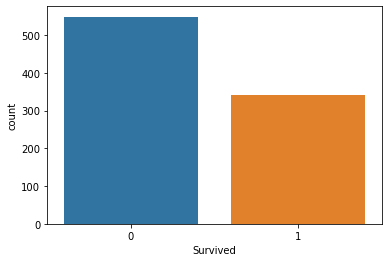

In [13]:
sns.countplot(x= "Survived", data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

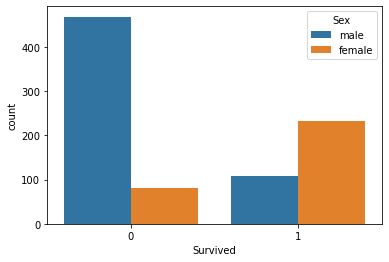

In [14]:
sns.countplot(x= "Survived",hue = "Sex", data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

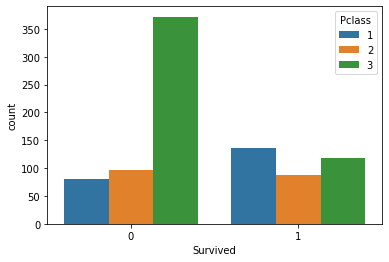

In [15]:
sns.countplot(x = "Survived", hue = "Pclass", data = df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

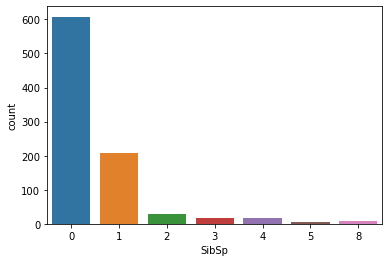

In [16]:
sns.countplot(x = "SibSp", data = df)

### Data Wrangling

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

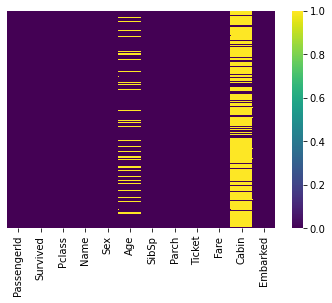

In [18]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

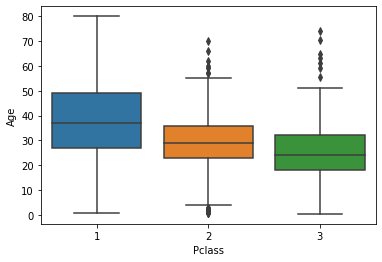

In [19]:
sns.boxplot(x="Pclass", y = "Age", data = df)

In [20]:
df.drop("Cabin", axis=1, inplace =True)

In [21]:
df.dropna(inplace = True)

<AxesSubplot:>

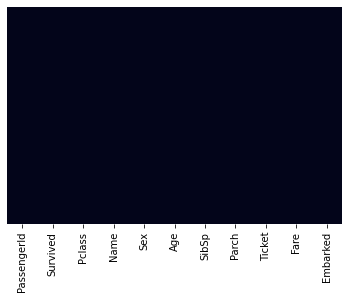

In [22]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
Sex = pd.get_dummies(df["Sex"])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [25]:
Sex = pd.get_dummies(df["Sex"], drop_first= True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
embark = pd.get_dummies(df["Embarked"] , drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
pcl = pd.get_dummies(df["Pclass"], drop_first = True)
pcl.head

<bound method NDFrame.head of      2  3
0    0  1
1    0  0
2    0  1
3    0  0
4    0  1
..  .. ..
885  0  1
886  1  0
887  0  0
889  0  0
890  0  1

[712 rows x 2 columns]>

In [28]:
df = pd.concat([df, Sex, embark, pcl], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [29]:
df.drop(["PassengerId", "Name", "Sex", "Embarked", "Ticket", "Pclass" , "Fare" ], axis = 1, inplace =True)
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


### Split the Data

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
x = df.drop("Survived", axis = 1)
y = df["Survived"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

### Fit the Model

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predictions = model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.794392523364486

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       122
           1       0.80      0.70      0.74        92

    accuracy                           0.79       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.79      0.79      0.79       214



<AxesSubplot:>

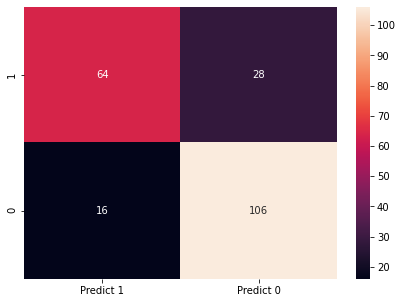

In [37]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions, labels = [1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1", "0"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

#### 1,1 = True Positive
#### 0,1 = False Negatives
#### 1,0 = False Positives
#### 0,0 = True Negatives

### Build Decision Tree Model

In [38]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [39]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9578313253012049
0.7570093457943925


### Reducing over fitting (Regularization) - Decision Tree

In [40]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.8353413654618473
0.7570093457943925


0.7570093457943925


<AxesSubplot:>

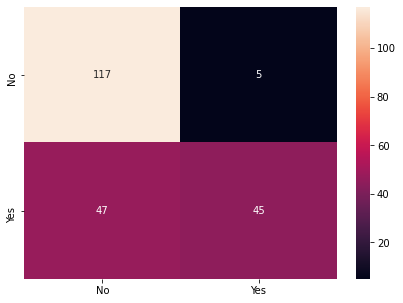

In [41]:
print(dTreeR.score(x_test, y_test))
y_predict = dTreeR.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

### Ensebmle Learning - Bagging

In [72]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, bootstrap=True, oob_score=True, random_state=1)
bgcl = bgcl.fit(x_train, y_train)

0.7476635514018691


<AxesSubplot:>

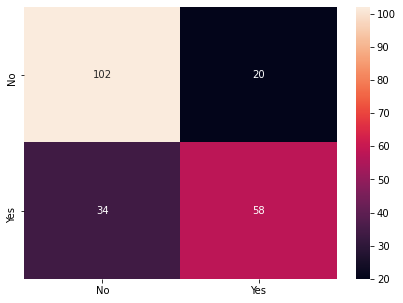

In [73]:
y_predict = bgcl.predict (x_test)
print(bgcl.score(x_test, y_test))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

### Ensebmle Learning - AdaBoosting

In [65]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier (n_estimators = 10, random_state = 1)
#abcl = AdaBoostClassisifier (n_estimators = 50, random_state = 1)
abcl = abcl.fit(x_train, y_train)

0.7710280373831776


<AxesSubplot:>

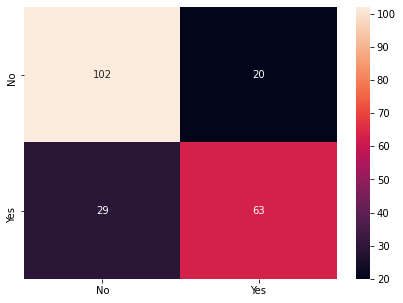

In [66]:
y_predict = abcl.predict (x_test)
print(abcl.score(x_test, y_test))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

### Ensebmle Learning - GradientBoostingClassifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.7710280373831776


<AxesSubplot:>

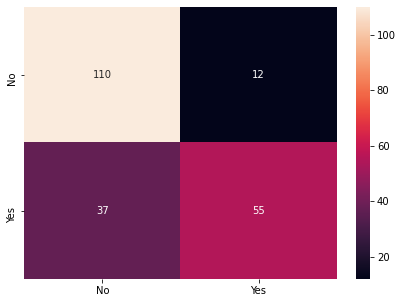

In [69]:
y_predict = gbcl.predict (x_test)
print(gbcl.score(x_test, y_test))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

### Ensemble RandomForest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 8)
rfcl = rfcl.fit(x_train, y_train)

0.7476635514018691


<AxesSubplot:>

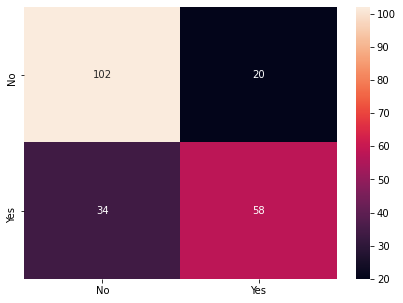

In [70]:
y_predict = rfcl.predict (x_test)
print(rfcl.score(x_test, y_test))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')